In [21]:
# The cell below imports the relevant libraries and read the data from the specified files

In [3]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('creditdefault_train.csv', header='infer')
test_data = pd.read_csv('creditdefault_test.csv', header='infer')



# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).
# X5: Age (year).
# X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



# Separate classes from dataset
y_train = train_data['Y']
X_train = train_data.drop(['Y'],axis=1)

y_test = test_data['Y']
X_test = test_data.drop(['Y'],axis=1)



In [23]:
# KNN for 1 to 10

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

scores = {}
total_k = 6

for k in range(1, total_k):
    
    # Initialize KNN
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    # Predict classes for testing data
    y_pred = knn.predict(X_test)
    
    # Store the total accuracy values and percentage
    scores[k] = metrics.accuracy_score(y_test, y_pred, normalize = False) / len(y_test)
    

print(scores)  


# Juan: I need to build a function to find the best of scores
# Use this: print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

{1: 0.6913333333333334, 2: 0.7639333333333334, 3: 0.734, 4: 0.7664, 5: 0.7518}


In [24]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=12)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred, normalize = False) / len(y_test)

print(score)


0.8001333333333334


In [25]:
'''
Using Python and any relevant libraries,
you are required to build the best predictive model
by tuning models using cross validation on the training dataset
with each of the following algorithms (seen in class):
kNN, decision trees, Random Forest, Bagging, Boosting, and SVM.
'''

'\nUsing Python and any relevant libraries,\nyou are required to build the best predictive model\nby tuning models using cross validation on the training dataset\nwith each of the following algorithms (seen in class):\nkNN, decision trees, Random Forest, Bagging, Boosting, and SVM.\n'

[0.9997333333333334, 0.8704, 0.9997333333333334]
[0.8154, 0.8186666666666667, 0.7974666666666667]


[Text(0, 0, 'Random Forest'), Text(0, 0, 'Bagging'), Text(0, 0, 'AdaBoost')]

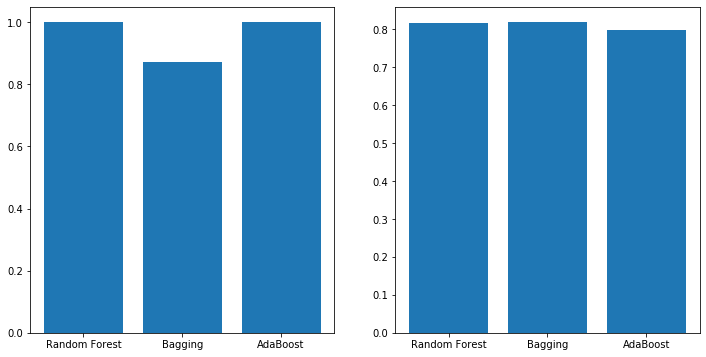

In [41]:
from sklearn import ensemble
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

# These numbers need to be checked my niggi
numBaseClassifiers = 500
maxdepth = 10

# Accuracy scores
trainAcc = []
testAcc = []


# Random Forest
rf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
rf.fit(X_train, y_train)
rf_y_predTrain = rf.predict(X_train)
rf_y_predTest = rf.predict(X_test)
trainAcc.append(metrics.accuracy_score(y_train, rf_y_predTrain))
testAcc.append(metrics.accuracy_score(y_test, rf_y_predTest))


# Bagging
bg = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
bg.fit(X_train, y_train)
bg_y_predTrain = bg.predict(X_train)
bg_y_predTest = bg.predict(X_test)
trainAcc.append(metrics.accuracy_score(y_train, bg_y_predTrain))
testAcc.append(metrics.accuracy_score(y_test, bg_y_predTest))


# AdaBoost
ab = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
ab.fit(X_train, y_train)
ab_y_predTrain = clf.predict(X_train)
ab_y_predTest = clf.predict(X_test)
trainAcc.append(metrics.accuracy_score(y_train, ab_y_predTrain))
testAcc.append(metrics.accuracy_score(y_test, ab_y_predTest))
    
    

print(trainAcc)
print(testAcc)

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

In [ ]:
from sklearn import linear_model
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn import metrics

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    print(param)
    clf = linear_model.LogisticRegression(C=param)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    LRtrainAcc.append(metrics.accuracy_score(y_train, y_predTrain))
    LRtestAcc.append(metrics.accuracy_score(y_test, y_predTest))

    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(metrics.accuracy_score(y_train, y_predTrain))
    SVMtestAcc.append(metrics.accuracy_score(y_test, y_predTest))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')


In [ ]:
'''
Out of the models tuned with the above algorithms,
select the best model and clearly justify your choice,
and evaluate its performance on the test set. 
'''

In [ ]:
# This library will work for accuracy calculation

In [ ]:
from sklearn import metrics
#metrics.accuracy_score() is the function needed. y_test and y_pred are the arguments we'll use


def get_best(prediction_values):
    # for loop
    best_value = -1
    return best_value


In [ ]:
def first_random_forest_implementation():
    # random forest
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    # rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    # rf.fit(X, y) # x is features and y is the label
    # # to get the predictions we use
    # prediction = rf.predict(arg) # where arg1 is the test features
    # # Calculate mean absolute percentage error (MAPE)
    # mape = 100 * (errors / test_labels)# Calculate and display accuracy
    # accuracy = 100 - np.mean(mape)
    # print('Accuracy:', round(accuracy, 2), '%.')
    # ### prediction_values['random_forest'] = random_forest_prediction
    rf = RandomForestClassifier(random_state=0, max_features=10)
    rfModel = rf.fit(X_train, y_train)
    y_pred = rfModel.predict(X_test)
    print('Accuracy on test data is %.2f' % (metrics.accuracy_score(y_test, y_pred)))

    # print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    # print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    # print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))